## PHASE 2: DATA PREPROCESSING

### This is the Car Evaluation Dataset from UCI Machine Learning Repository

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import CategoricalDtype

##### Fetch the dataset from the UCI Machine Learning Repository   
Ensure that you have ucimlrepo installed. If not, install it using the following command:   
```!pip install ucimlrepo```   
Then, fetch the dataset as follows below

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

##### Creating the dataframe

In [4]:
df = pd.DataFrame(X, columns=car_evaluation.data.feature_names)
df_y = pd.DataFrame(y, columns=car_evaluation.data.target_names)
car_df = pd.concat([df, df_y], axis=1)
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


##### Descriptive Statistics

In [5]:
car_df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


Check the data types of the columns

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Check for missing values and outliers

In [7]:
car_df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [8]:
feature_names = list(car_df.columns.values[:-1])
for feature in feature_names:
    unique_count =car_df[feature].nunique()
    unique_vals = car_df[feature].unique()
    print("{}: {} values, {}".format(feature, unique_count, unique_vals))

buying: 4 values, ['vhigh' 'high' 'med' 'low']
maint: 4 values, ['vhigh' 'high' 'med' 'low']
doors: 4 values, ['2' '3' '4' '5more']
persons: 3 values, ['2' '4' 'more']
lug_boot: 3 values, ['small' 'med' 'big']
safety: 3 values, ['low' 'med' 'high']


Some graphs to visualize the data

Barplots

<Axes: xlabel='buying'>

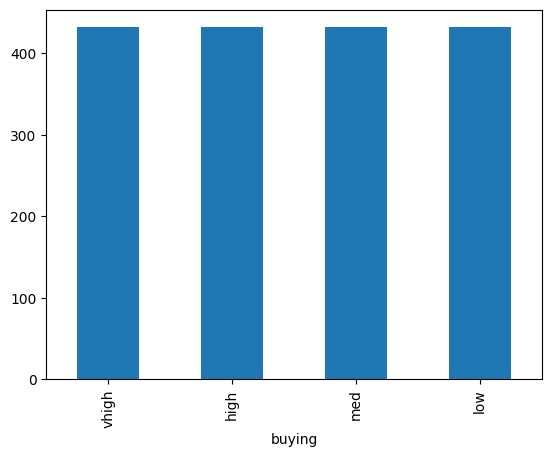

In [9]:
car_df['buying'].value_counts().plot(kind='bar')

<Axes: xlabel='maint'>

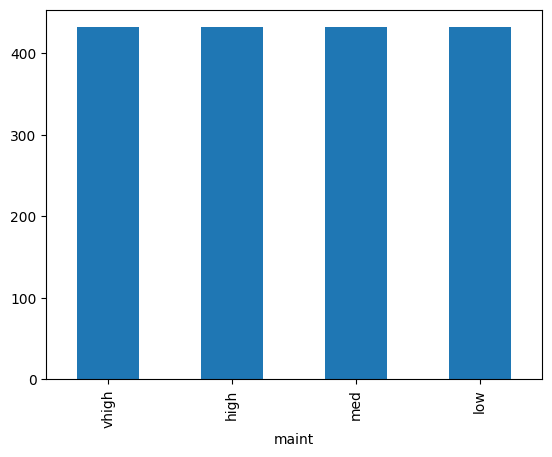

In [10]:
car_df['maint'].value_counts().plot(kind='bar')

Pie Plots

([<matplotlib.patches.Wedge at 0x1f6d8ec84d0>,
 [Text(0.7778174593052024, 0.7778174593052024, '2'),
  Text(-0.7778174593052023, 0.7778174593052024, '3'),
  Text(-0.7778174593052025, -0.7778174593052023, '4'),
  Text(0.7778174593052022, -0.7778174593052025, '5more')],
 [Text(0.4242640687119285, 0.4242640687119285, '25.0%'),
  Text(-0.42426406871192845, 0.4242640687119285, '25.0%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

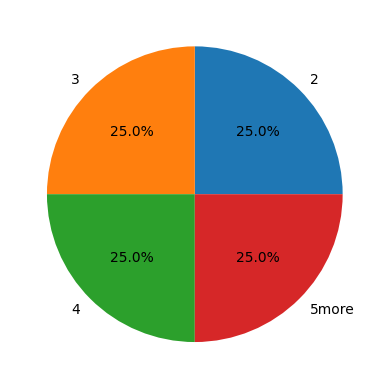

In [11]:
labels = car_df['doors'].unique()
values = car_df['doors'].value_counts() 
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1f6d8f0ea90>,
 [Text(0.5499999702695115, 0.9526279613277875, '2'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '4'),
  Text(0.5500001486524352, -0.9526278583383436, 'more')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

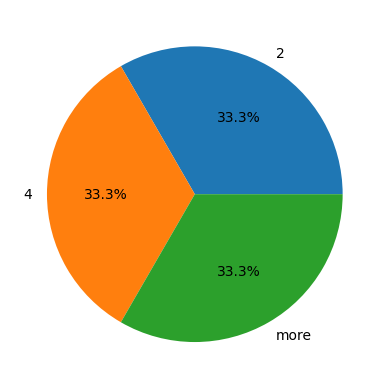

In [12]:
labels = car_df['persons'].unique()
values = car_df['persons'].value_counts() 
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')

##### Encoding the categorical variable to numeric

In [13]:
df_encoded = pd.get_dummies(car_df, columns=feature_names, drop_first=True,dtype=float)
df_encoded.tail()

,class,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
1723,good,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1724,vgood,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1725,unacc,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1726,good,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1727,vgood,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Setting the target variable to range from 0-4

In [14]:
df_encoded['class'], class_uniques = pd.factorize(df_encoded['class'])
df_encoded.tail()

,class,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
1723,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1724,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1725,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1726,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1727,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: xlabel='class'>

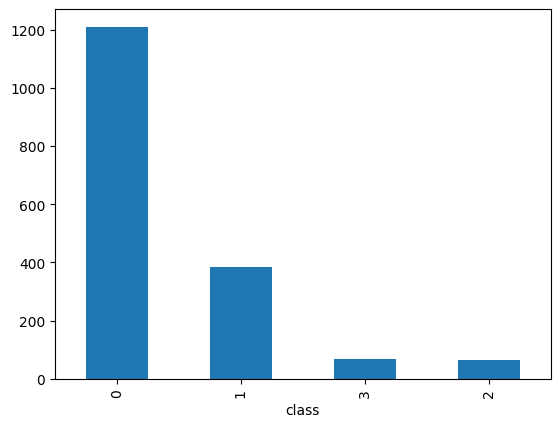

In [15]:
df_encoded['class'].value_counts().plot(kind='bar')

In [25]:
correlation_matrix = df_encoded.corr()
correlation_matrix

,class,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
class,1.000000,2.231989e-01,9.974622e-02,-1.936776e-01,1.820480e-01,9.974622e-02,-1.936776e-01,4.920217e-03,2.817942e-02,2.817942e-02,2.065278e-01,1.884498e-01,2.739096e-02,-1.188768e-01,-3.949776e-01,9.312925e-02
buying_low,0.223199,1.000000e+00,-3.333333e-01,-3.333333e-01,8.737866e-17,-7.230156e-17,-4.200172e-16,-2.141634e-18,2.277842e-16,-2.124501e-17,4.091810e-17,-8.435424e-17,-2.889447e-16,7.333783e-17,-2.710037e-16,-8.876080e-17
buying_med,0.099746,-3.333333e-01,1.000000e+00,-3.333333e-01,-1.745860e-16,-1.429755e-16,2.774701e-16,2.778128e-16,1.928327e-16,-1.536837e-16,2.675414e-16,-1.273182e-16,-9.474114e-17,1.327478e-16,-2.385053e-16,1.307019e-16
buying_vhigh,-0.193678,-3.333333e-01,-3.333333e-01,1.000000e+00,1.593376e-17,3.212451e-17,-1.489721e-16,-2.183610e-16,-2.529698e-16,1.002285e-16,-2.958693e-16,-7.380996e-17,1.772069e-16,1.125248e-17,4.176007e-16,-8.899687e-17
maint_low,0.182048,8.737866e-17,-1.745860e-16,1.593376e-17,1.000000e+00,-3.333333e-01,-3.333333e-01,6.673331e-17,6.279271e-17,-3.563679e-17,8.057718e-17,2.518037e-18,-9.694442e-17,-8.340997e-17,-1.038690e-16,-4.658368e-17
maint_med,0.099746,-7.230156e-17,-1.429755e-16,3.212451e-17,-3.333333e-01,1.000000e+00,-3.333333e-01,1.362079e-17,8.480870e-18,6.339236e-18,-9.600016e-18,-3.902957e-17,2.077380e-17,8.049849e-17,-1.628855e-17,2.726562e-17
maint_vhigh,-0.193678,-4.200172e-16,2.774701e-16,-1.489721e-16,-3.333333e-01,-3.333333e-01,1.000000e+00,2.287265e-17,-4.360367e-17,-1.696174e-17,-4.434106e-17,9.521327e-18,4.918041e-18,-4.811811e-17,5.315419e-17,1.927872e-18
doors_3,0.004920,-2.141634e-18,2.778128e-16,-2.183610e-16,6.673331e-17,1.362079e-17,2.287265e-17,1.000000e+00,-3.333333e-01,-3.333333e-01,2.490496e-17,2.872136e-17,1.766560e-17,2.112790e-17,1.916069e-17,2.250496e-17
doors_4,0.028179,2.277842e-16,1.928327e-16,-2.529698e-16,6.279271e-17,8.480870e-18,-4.360367e-17,-3.333333e-01,1.000000e+00,-3.333333e-01,-1.349510e-17,1.298363e-17,-1.286560e-17,8.537719e-18,-2.034102e-17,-1.054428e-17
doors_5more,0.028179,-2.124501e-17,-1.536837e-16,1.002285e-16,-3.563679e-17,6.339236e-18,-1.696174e-17,-3.333333e-01,-3.333333e-01,1.000000e+00,-1.432134e-17,-2.423611e-17,-2.313446e-17,-1.321969e-17,-3.698367e-17,-2.990169e-17


##### Heatmap to visualize the correlation between the columns

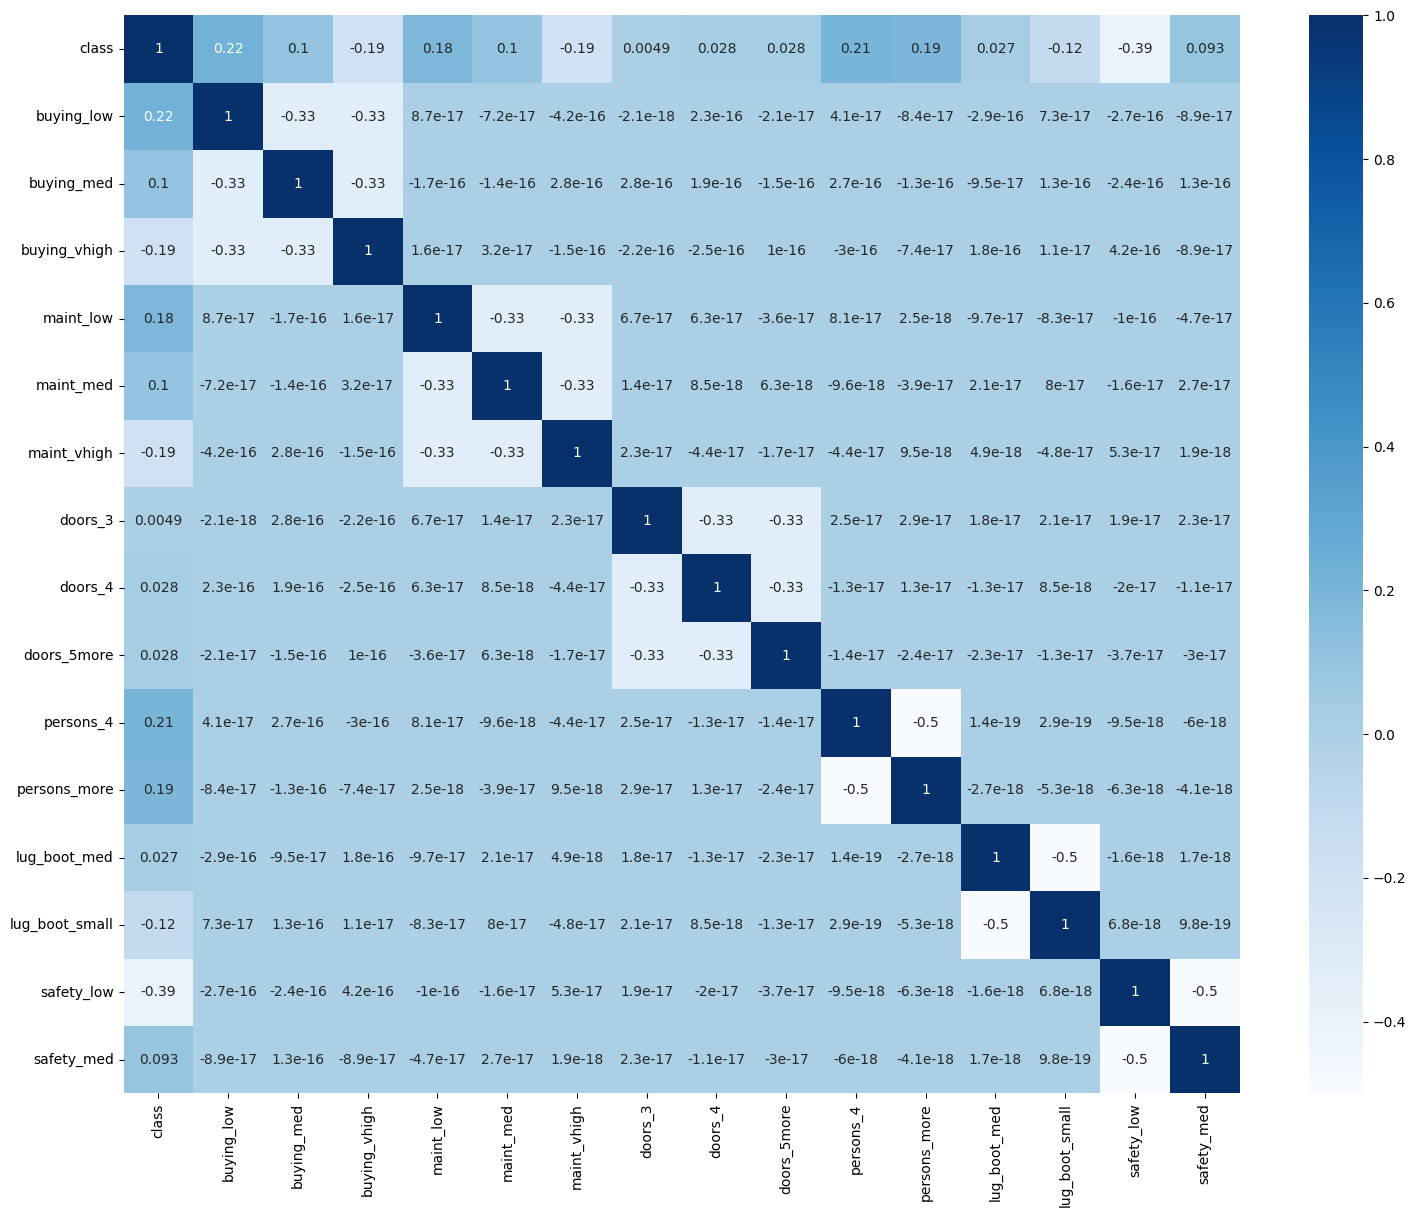

In [17]:
plt.figure(figsize=(18, 14))
sns.heatmap(df_encoded.corr(),cmap='Blues', annot=True)
plt.show()

Boxplots to visualize the distribution of the data

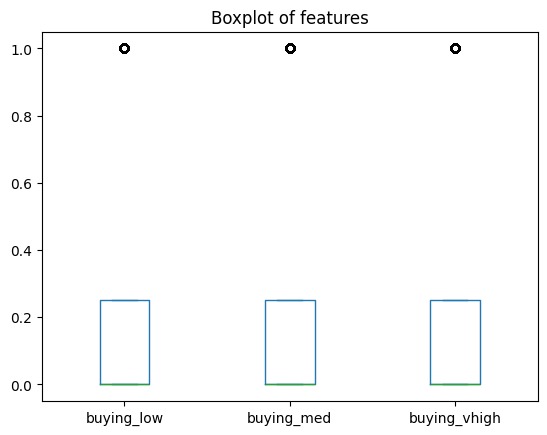

In [18]:

ax = df_encoded[['buying_low','buying_med','buying_vhigh']].plot(kind='box', title='Boxplot of features')
plt.show()

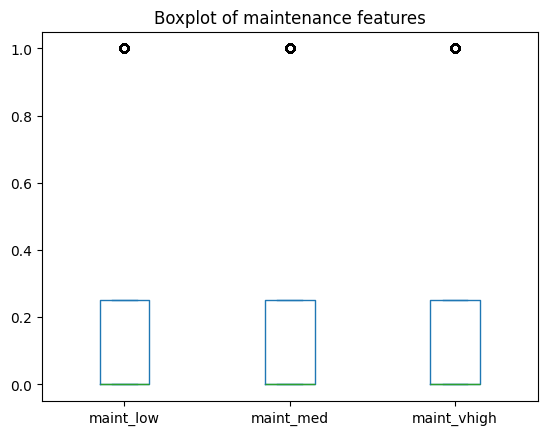

In [19]:
ax = df_encoded[['maint_low','maint_med','maint_vhigh']].plot(kind='box', title='Boxplot of maintenance features')

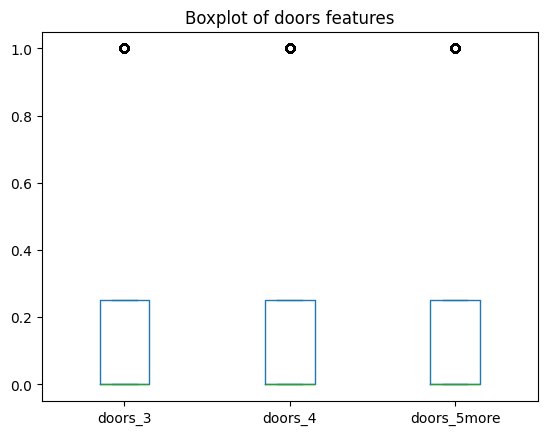

In [20]:
ax = df_encoded[['doors_3','doors_4','doors_5more']].plot(kind='box', title='Boxplot of doors features')

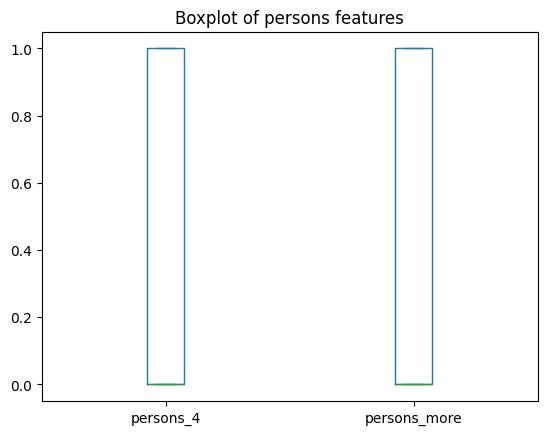

In [21]:
ax = df_encoded[['persons_4','persons_more']].plot(kind='box', title='Boxplot of persons features')

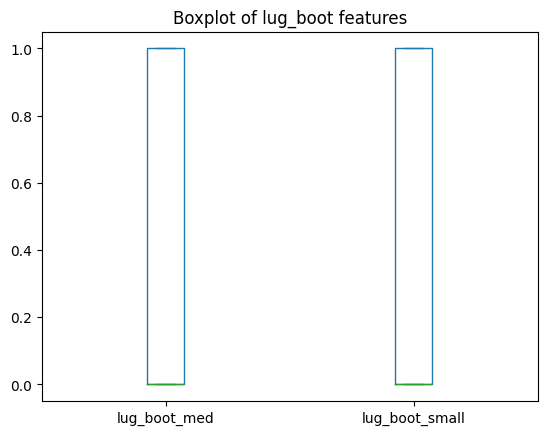

In [22]:
ax = df_encoded[['lug_boot_med','lug_boot_small']].plot(kind='box', title='Boxplot of lug_boot features')

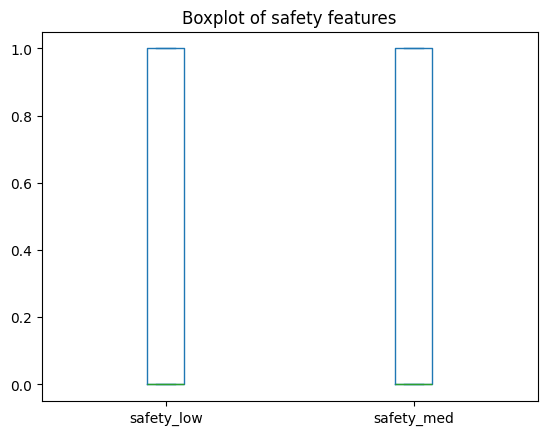

In [23]:
ax = df_encoded[['safety_low','safety_med']].plot(kind='box', title='Boxplot of safety features')

(array([1210.,    0.,    0.,    0.,    0.,    0.,  384.,    0.,    0.,
           0.,    0.,    0.,    0.,   65.,    0.,    0.,    0.,    0.,
           0.,   69.]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ]),
 <BarContainer object of 20 artists>)

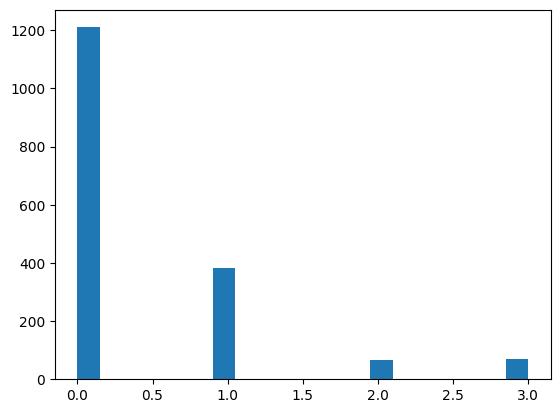

In [24]:
plt.hist(df_encoded['class'], bins=20)